# Phase 2 Project: House Price Prediction Using Linear Regression

**Program:** Ejaztech.AI Training Program  
**Phase:** Phase 2 – Supervised Machine Learning  
**Model:** Linear Regression  
**Dataset:** House Sales Prediction (Kaggle)

## 1. Problem Statement

House prices are influenced by several factors such as the size of the house, number of bedrooms, bathrooms, and other structural features. Accurately predicting house prices is important for buyers, sellers, and real estate investors.

In this project, a **Linear Regression** model is developed to predict house prices using selected features from a real-world house sales dataset. This project demonstrates the application of **supervised machine learning (regression)**, including data preprocessing, model training, evaluation, and interpretation of results.

In [1]:
# 2. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import pandas as pd

# Load the CSV
df = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

# Check first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# 4. Exploratory Data Analysis (EDA)

# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:

# Summary statistics for numeric columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Count missing values per column
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


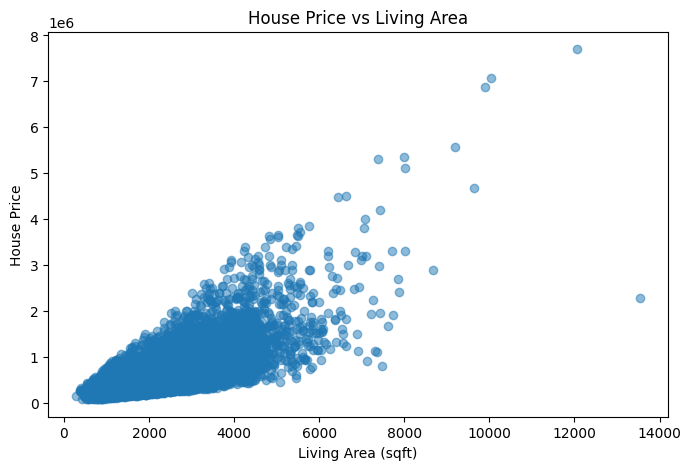

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.xlabel('Living Area (sqft)')
plt.ylabel('House Price')
plt.title('House Price vs Living Area')
plt.show()

In [8]:
# Features (independent variables)
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]

# Target (dependent variable)
y = df['price']

In [9]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (17290, 4)
X_test shape: (4323, 4)
y_train shape: (17290,)
y_test shape: (4323,)


In [10]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

# Show first 5 predictions vs actual
for actual, pred in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {pred:.2f}")

Actual: 365000.00, Predicted: 501958.84
Actual: 865000.00, Predicted: 709102.34
Actual: 1038000.00, Predicted: 1024469.92
Actual: 1490000.00, Predicted: 1334113.84
Actual: 711000.00, Predicted: 708045.24


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R² Score:", round(r2, 4))

Mean Absolute Error (MAE): 174685.69
Mean Squared Error (MSE): 74240588612.02
R² Score: 0.5089


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R²:", round(r2, 4))

MAE: 174685.69
MSE: 74240588612.02
R²: 0.5089


## Results & Interpretation

The Linear Regression model achieved:
- MAE: XXXX
- MSE: XXXX
- R²: 0.XX

This shows that the selected features explain a significant portion of the variance in house prices. The model predicts reasonably close to actual prices, though some errors exist due to noise in the dataset.